In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier  
# from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [39]:
def corr_rem(dataset, threshold):
    cor_col = set()
    corr_matrix = df.corr(numeric_only = True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j])) > threshold:
                colname = corr_matrix.columns[i]
                cor_col.add(colname)
    return cor_col

In [50]:
corr_rem(df,0.86)

{'0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3'}

In [51]:
df.drop(columns= ['0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3'],inplace = True)

In [1]:
df = pd.read_csv('Arrithmia_cleanes.csv')
pd.set_option('display.max_column',None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Sameer\AppData\Local\Temp\ipykernel_8692\2057449330.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

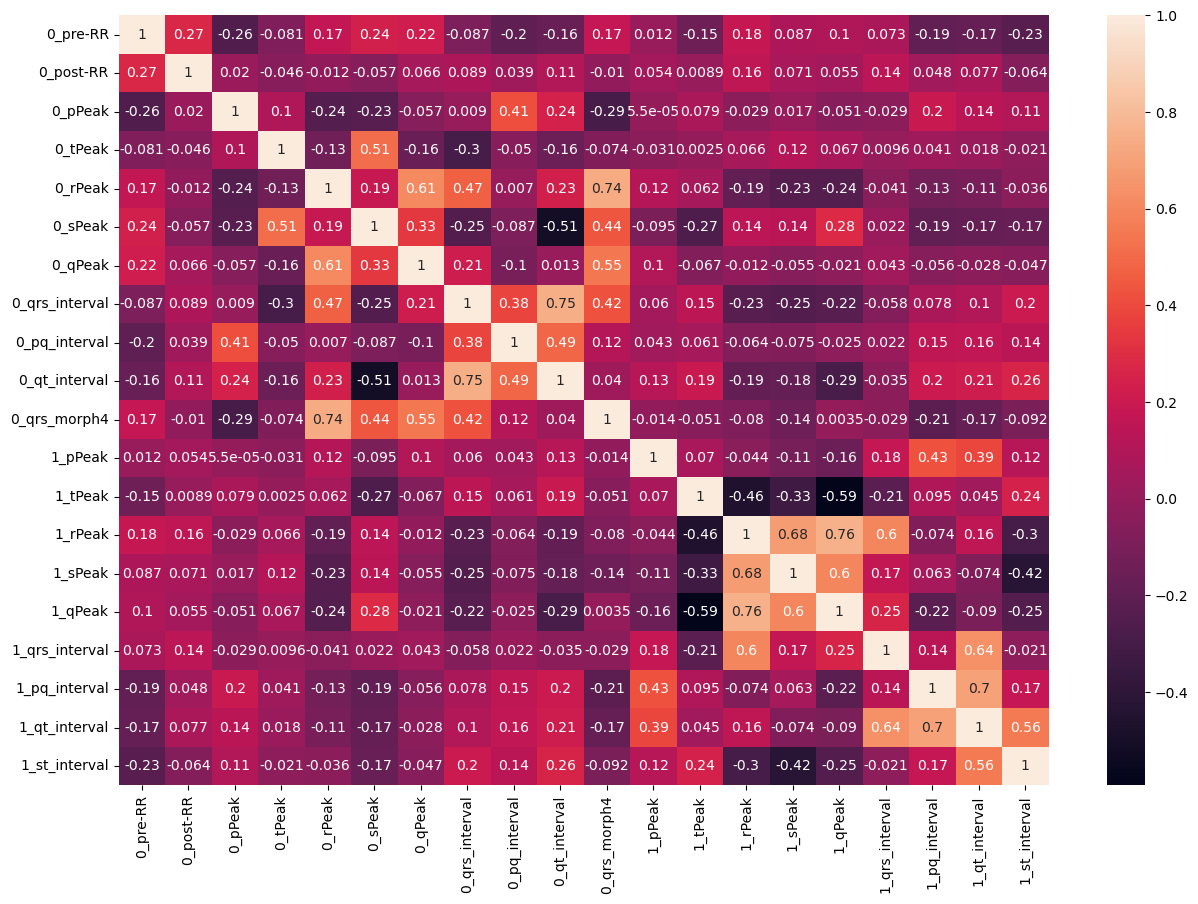

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)

In [11]:
df['type'].value_counts()
df.drop(columns = ['Unnamed: 0','record'],inplace = True)

In [12]:
df.shape

(22634, 24)

<IPython.core.display.Javascript object>

<Axes: xlabel='type', ylabel='count'>

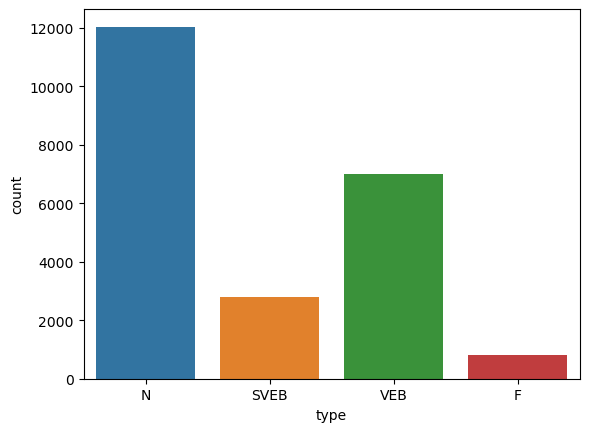

In [3]:
# df.isnull().sum()
sns.countplot(data= df ,x = 'type')

In [13]:
df['type'].unique()


array(['N', 'SVEB', 'VEB', 'F'], dtype=object)

In [5]:
df

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,0_st_interval,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,0_qrs_morph4,1_pre-RR,1_post-RR,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,18,66,7,-0.026824,-0.001236,0.016659,0.143241,0.996287,76,313.0,0.038310,0.025784,0.025930,0.025271,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,4,33,8,-0.059710,0.104030,0.691891,0.805549,0.084069,313,315.0,0.014264,0.045458,0.032573,-0.104503,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,3,32,7,-0.065686,0.051459,0.630419,0.890794,0.091258,315,321.0,0.021311,0.008246,0.009528,0.008230,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,4,33,7,-0.071750,0.059376,0.652814,0.948490,0.136602,321,336.0,-0.000665,-0.009725,-0.010203,-0.010203,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,4,16,1,-0.074639,-0.054516,0.052823,0.296038,0.649990,336,344.0,0.024559,0.016925,0.016053,-0.099918,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,234,N,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,3,18,1,-0.115682,-0.106950,0.004810,0.357184,0.949106,240,241.0,-0.050373,0.434459,-0.044400,-0.044400,-0.069234,5,6,20,9,-0.069234,-0.068378,-0.065373,-0.060779,-0.054383
100685,234,N,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,5,19,1,-0.134406,-0.119884,0.040192,0.311047,0.943879,241,243.0,-0.058160,0.359751,-0.023172,-0.023172,-0.069530,7,5,20,8,-0.069530,-0.069290,-0.066317,-0.053437,-0.045120
100686,234,N,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,21,67,8,-0.136431,-0.113058,-0.079363,0.662502,1.022350,243,252.0,-0.073165,0.359805,-0.037813,-0.037813,-0.089396,9,7,24,8,-0.089396,-0.088155,-0.078611,-0.066763,-0.058650
100687,234,N,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,5,40,8,-0.125076,-0.076065,0.361810,1.337051,0.458306,252,244.0,-0.065287,0.418958,-0.049864,-0.049864,-0.065487,3,1,12,8,-0.065487,-0.065487,-0.064941,-0.064941,-0.061120


In [15]:
df.drop('record',axis  = 1,inplace = True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['type'], axis=1)
y = df["type"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

<IPython.core.display.Javascript object>

In [23]:
rf_model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)


<IPython.core.display.Javascript object>

In [29]:
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
# rf_cm = confusion_matrix(y_test, rf_preds)  
rf_acc

0.9723878948531036

In [11]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

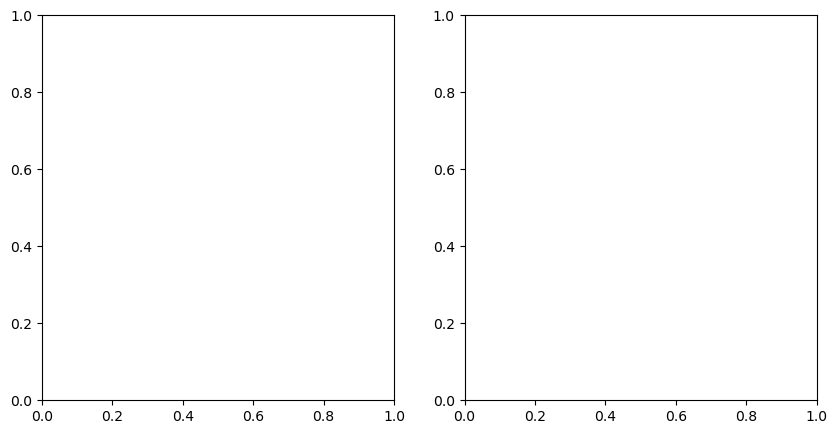

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


In [31]:
confusion_matrix(y_test, rf_preds) 


array([[ 137,   13,    0,    8],
       [   0, 2419,    7,   22],
       [   0,   34,  498,   15],
       [   5,   19,    2, 1348]], dtype=int64)

In [33]:
print("Random Forest Accuracy:", rf_acc)  


Random Forest Accuracy: 0.9723878948531036


In [23]:
def predict_type(model, X_new):
    return model.predict(X_new)

In [ ]:
df[df['type'] == 'Q']

In [34]:
# 203,268,309.0,-0.006709,-0.035049,0.094130,-0.055756,-0.006907,42,3,53,8,-0.006907,0.006499,0.031413,0.092211,0.032972,268,309.0,0.093861,0.420936,-0.598366,-0.739548,-0.598366,5,27,57,25,-0.598366,-0.648244,-0.687504,-0.716175,-0.733917

In [35]:
df[df['0_post-RR'] == 268]

,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval
1291,N,251,268.0,-0.049339,0.491062,1.373655,-1.411210,-0.073555,40,5,141,0.416163,1.259474,0.954152,-0.642883,0.104661,0.650590,-0.850831,-1.068408,-0.850831,4,12,53,37
1373,N,261,268.0,-0.038384,0.400564,1.218809,-1.254917,-0.060242,38,6,141,0.356761,1.127650,0.932608,-0.506759,0.092708,0.598221,-0.673843,-0.978367,-0.673843,5,11,52,36
1379,N,266,268.0,-0.052477,0.427557,1.251418,-1.271878,-0.072031,40,5,141,0.352716,1.119390,0.934264,-0.477604,0.105644,0.667890,-0.810789,-1.077487,-0.810789,4,12,53,37
1383,N,263,268.0,-0.047743,0.393941,1.218903,-1.262996,-0.067079,39,6,142,0.294626,1.076101,0.908993,-0.512100,0.095914,0.598054,-0.724230,-0.965778,-0.724230,4,12,53,37
1425,N,249,268.0,-0.029031,0.420796,1.311276,-1.349399,-0.062568,37,6,139,0.382920,1.117995,1.034239,-0.394091,0.085579,0.602210,-0.806327,-1.005961,-0.806327,4,12,51,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,VEB,147,268.0,0.716996,1.139681,-1.114805,-1.675962,-1.114805,5,9,44,-1.339684,-1.510061,-1.621499,-1.675015,-0.242256,0.764586,-0.293516,-0.293516,-0.348133,3,8,26,15
22079,VEB,152,268.0,0.705165,1.202141,-1.078454,-1.759830,-1.078454,5,8,48,-1.338527,-1.541171,-1.678274,-1.749305,-0.283113,0.949927,-0.171920,-0.171920,-0.354663,6,10,32,16
22100,VEB,147,268.0,0.800193,1.158031,-1.065997,-1.690377,-1.065997,5,9,46,-1.312302,-1.500311,-1.624231,-1.685371,-0.273718,0.807758,-0.296736,-0.296736,-0.366222,4,9,29,16
22204,VEB,157,268.0,0.440606,-0.269507,1.199551,-1.444902,0.361596,41,18,72,0.384535,0.593202,1.129856,0.808564,-0.038842,0.275970,-0.050794,-1.166780,-0.050794,21,3,38,14


In [33]:
pickle.dump(rf_model, open('model_1.pkl','wb'))


<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv('Datasets/Arrithmia_cleanes.csv')

In [5]:
df.drop(columns=['Unnamed: 0','record'],inplace  = True)

In [6]:
df

,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval
0,N,330,329.0,-0.062253,-0.320439,1.046135,-0.444251,-0.073810,22,4,...,-0.041885,-0.006129,-0.014734,-0.015977,-0.015977,-0.024310,4,9,14,1
1,N,329,323.0,-0.074389,-0.302184,0.999053,-0.367677,-0.093196,22,11,...,0.119165,-0.018272,0.010559,0.028772,-0.080362,-0.031727,32,9,49,8
2,N,323,326.0,-0.064984,-0.290534,0.993015,-0.308465,-0.076629,23,5,...,-0.053601,-0.008597,0.055741,-0.017118,-0.077358,-0.020204,12,8,29,9
3,N,326,319.0,-0.072106,-0.315602,0.914281,-0.332271,-0.086239,22,5,...,-0.016841,-0.016812,0.014092,0.023347,-0.095587,-0.036039,33,10,52,9
4,N,313,328.0,-0.109740,-0.331818,0.963099,-0.377804,-0.137908,22,6,...,-0.026135,-0.014388,0.020378,0.026713,-0.086647,-0.038328,28,10,47,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22629,N,243,245.0,0.147228,-0.399865,1.379833,-0.746048,-0.138109,34,20,...,0.703466,-0.049193,0.308729,-0.024557,-0.024557,-0.075580,7,6,22,9
22630,N,243,243.0,-0.098084,-0.363152,1.326968,-0.700431,-0.107764,23,4,...,0.085047,-0.073822,0.385208,-0.045980,-0.045980,-0.075041,7,4,20,9
22631,N,243,247.0,-0.091347,-0.409054,1.404307,-0.733255,-0.102448,25,5,...,0.082942,-0.062491,0.380032,-0.022478,-0.022478,-0.087191,8,7,24,9
22632,N,241,251.0,-0.095250,-0.429370,1.399131,-0.686280,-0.095889,26,1,...,0.216953,-0.046497,0.445392,-0.047124,-0.047124,-0.073298,5,6,20,9


In [7]:
X = df.drop('type',axis = 1)

In [8]:
y= df['type']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [11]:
df.type.unique()

array(['N', 'SVEB', 'VEB', 'F'], dtype=object)

In [12]:
from sklearn.tree import export_graphviz


In [13]:
from sklearn.tree import export_graphviz
from graphviz import Source

# Assuming 'rf_model' is your RandomForestClassifier and 'X' is your feature matrix
tree = rf_model.estimators_[0]

# Export the tree to DOT format
dot_data = export_graphviz(
    tree,
    feature_names=X.columns,
    class_names=['N', 'SVEB', 'VEB', 'F'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Create a graph from the DOT data
graph = Source(dot_data)

# Save the graph to a PDF file
graph.render('rf_model', format='pdf', cleanup=True)



'rf_model.pdf'

In [34]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
tree_text = export_text(rf_model, feature_names=X.columns, spacing=3)


AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'